# <span style="color:#336699">Introduction to the Forecast and Historical Weather Service (FHWS)</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:gabriel.sansigolo@inpe.br">gabriel.sansigolo@inpe.br</a>
    <br/><br/>
    Last Update: Oct 12, 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the FHWS to create creating <em>multidimensional arrays</em> from satellite imagery.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Ferreira, K. R.; Queiroz, G. R.; Marujo, R. F. B.<a href="http://www.google.com" target="_blank">simplecube: a python package for creating multidimensional arrays from satellite imagery
    </div>
</div>

In [1]:
from fhws import data_cube, get_timeseries_data_cube

In [2]:
stac_url = "https://data.inpe.br/bdc/stac/v1"

In [3]:
prec_merge_cube=data_cube(
    stac_url=stac_url,
    collection="prec_merge_daily-1",
    start_date="2024-01-01",
    end_date="2024-12-31",
    bbox="-47.2797,-17.0725,-45.4779,-15.4484",
    bands=["merge_daily"]
)

prec_merge_cube

Fetching... : 100%|██████████| 367/367 [00:00<00:00, 1063.00 scenes/s]


<xarray.Dataset> Size: 1GB
Dimensions:    (latitude: 924, longitude: 1001, time: 367)
Coordinates:
  * latitude   (latitude) float64 7kB -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude  (longitude) float64 8kB 239.9 240.0 240.1 ... 339.8 339.9 339.9
  * time       (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2025-01-01
Data variables:
    rdp        (time, latitude, longitude) float32 1GB 0.0 0.0 ... 0.125 0.125

In [4]:
ts = get_timeseries_data_cube(
    datacube=prec_merge_cube,
    geom=[dict(coordinates= [-16.4, -46,6])],
    band="rdp"
)

<Axes: xlabel='timeline', ylabel='values'>

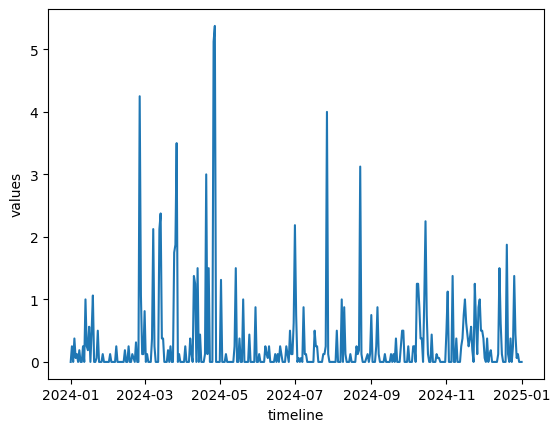

In [5]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(ts)
sns.lineplot(x='timeline', y='values', data=df)